In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r'C:/Users/arsha/Desktop/BDaccident.csv')
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,injuries,dead,Victims,Vehicle Involved,Latitude,Longitude,Vehicle Type,Year
0,1,Gopalganj,birshordi,dhaka_barisal_highway,Sunday,April,1,23,Night,26,8,34,1,23.253761,90.018641,bus,2018
1,2,Dhaka,savar,dhaka_aricha_highway,Tuesday,April,3,22,Night,0,2,2,3,23.851718,90.258876,truck_cycle,2018
2,3,Dhaka,savar,dhaka_aricha_highway,Tuesday,April,3,22,Night,0,2,2,1,23.850717,90.258543,truck,2018
3,4,Dhaka,savar,nobinagar_chandra_highway,Tuesday,April,3,21,Night,0,1,1,1,24.013214,90.246366,truck,2018
4,5,Satkhira,kaliganj,kaliganj_symganj_road,Tuesday,April,3,21,Night,2,2,4,2,22.482941,89.050455,cycle,2018


In [3]:
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

# New column names
df.columns

Index(['id', 'district_name', 'neighborhood_name', 'street', 'weekday',
       'month', 'day', 'hour', 'part_of_the_day', 'injuries', 'dead',
       'victims', 'vehicle_involved', 'latitude', 'longitude', 'vehicle_type',
       'year'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 17 columns):
id                   555 non-null int64
district_name        555 non-null object
neighborhood_name    481 non-null object
street               305 non-null object
weekday              555 non-null object
month                555 non-null object
day                  555 non-null int64
hour                 555 non-null int64
part_of_the_day      555 non-null object
injuries             555 non-null int64
dead                 555 non-null int64
victims              555 non-null int64
vehicle_involved     555 non-null int64
latitude             555 non-null float64
longitude            555 non-null float64
vehicle_type         555 non-null object
year                 555 non-null int64
dtypes: float64(2), int64(8), object(7)
memory usage: 73.8+ KB


In [5]:
df.describe()

,id,day,hour,injuries,dead,victims,vehicle_involved,latitude,longitude,year
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,278.000000,15.286486,14.272072,3.003604,1.520721,4.533333,1.535135,23.968836,90.004813,2017.531532
std,160.358972,8.726640,5.810472,6.347630,1.206564,6.780484,0.527348,1.149428,1.052418,0.499455
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,21.425297,88.125404,2017.000000
25%,139.500000,7.000000,9.000000,0.000000,1.000000,1.000000,1.000000,23.014664,89.163881,2017.000000
50%,278.000000,16.000000,14.000000,0.000000,1.000000,2.000000,2.000000,23.868220,89.879230,2018.000000
75%,416.500000,23.000000,20.000000,3.000000,2.000000,4.500000,2.000000,24.826974,90.561091,2018.000000
max,555.000000,31.000000,24.000000,40.000000,10.000000,42.000000,4.000000,26.632650,92.219195,2018.000000


In [6]:
pd.isnull(df).any()


id                   False
district_name        False
neighborhood_name     True
street                True
weekday              False
month                False
day                  False
hour                 False
part_of_the_day      False
injuries             False
dead                 False
victims              False
vehicle_involved     False
latitude             False
longitude            False
vehicle_type         False
year                 False
dtype: bool

In [7]:
df.drop(['neighborhood_name','street'],axis=1 ,inplace=True)
list(df.columns)

['id',
 'district_name',
 'weekday',
 'month',
 'day',
 'hour',
 'part_of_the_day',
 'injuries',
 'dead',
 'victims',
 'vehicle_involved',
 'latitude',
 'longitude',
 'vehicle_type',
 'year']

In [8]:
list(df.month.unique())
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df['month'].replace(month_to_int,inplace=True)

# Obtain new month names
list(df.month.unique())

[4, 2, 1, 6, 3, 5, 12, 11, 10, 7, 8, 9]

In [9]:
# Combine columns month day hour and year to create a single datetime column.
df['date']=pd.to_datetime(df[['year', 'month', 'day','hour']])

# Observe the first 5 columns.
df.head()

,id,district_name,weekday,month,day,hour,part_of_the_day,injuries,dead,victims,vehicle_involved,latitude,longitude,vehicle_type,year,date
0,1,Gopalganj,Sunday,4,1,23,Night,26,8,34,1,23.253761,90.018641,bus,2018,2018-04-01 23:00:00
1,2,Dhaka,Tuesday,4,3,22,Night,0,2,2,3,23.851718,90.258876,truck_cycle,2018,2018-04-03 22:00:00
2,3,Dhaka,Tuesday,4,3,22,Night,0,2,2,1,23.850717,90.258543,truck,2018,2018-04-03 22:00:00
3,4,Dhaka,Tuesday,4,3,21,Night,0,1,1,1,24.013214,90.246366,truck,2018,2018-04-03 21:00:00
4,5,Satkhira,Tuesday,4,3,21,Night,2,2,4,2,22.482941,89.050455,cycle,2018,2018-04-03 21:00:00


In [10]:
print('Total number of accidents:{}'.format(df.shape[0]))

Total number of accidents:555


In [11]:
district_to_int = {'Sirajganj':13,'Bogra':14,'Gopalganj':15,'Gazipur':16,'Sylhet':17,'Jhenaidah':18,'Mymensingh':19,"Cox's Bazar":20,'Kurigram':21,'Sherpur':22,'Tangail':23,'Kushtia':24,'Chuadanga':25,'Thakurgaon':26,'Rangpur':27,'Jamalpur':28,'Kishoreganj':29,'Habiganj':30,'Narayanganj':31,'Shariatpur':32,'Feni':33,'Chittagong':34,'Jessore':35,'Rajshahi':36,'Satkhira':37,'Madaripur':38,'Narsingdi':39,'Pabna':40,'Khagrachhari':41,'Rangamati':42,'Brahmanbaria':43,'Comilla':44,'Bandarban':45,'Jaipurhat':46,'Rajbari':47,'Chandpur':48,'Munshiganj':49,'Barisal':50,'Patuakhali':51,'Bagerhat':52,'Magura':53,'Natore':54,'ChapaiNawabganj':55,'Gaibandha':56,'Panchagarh':57,'Meherpur':58,'Narail':59,'Barguna':60,'Bhola':61,'Jhalokati':62,'Pirojpur':63,'Lakshmipur':64,'Manikganj':65,'Khulna':66,'Netrokona':67,'Naogaon':68,'Lalmonirhat':69,'Nilphamari':70,'Panchagarh':71,'Moulvibazar':72,'Sunamganj':73,'Faridpur':74,'Dinajpur':75,'Noakhali':76,'Dhaka':77}
#df['month'].replace(month_to_int,inplace=True)
df['district_name'].replace(district_to_int,inplace=True)
list(df.district_name.unique())

[15,
 77,
 37,
 75,
 34,
 43,
 18,
 22,
 69,
 28,
 38,
 17,
 27,
 19,
 55,
 54,
 65,
 49,
 66,
 63,
 56,
 36,
 29,
 14,
 31,
 74,
 51,
 26,
 62,
 73,
 13,
 47,
 40,
 32,
 33,
 16,
 39,
 46,
 68,
 35,
 44,
 52,
 23,
 71,
 48,
 30,
 76,
 20,
 53,
 61,
 41,
 24,
 45,
 21,
 50,
 25,
 70,
 64]

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(555, 16)

In [14]:
import calendar
# Number of accident per month
accidents_month = df.groupby(df['date'].dt.month).count().date

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      46
February     29
March        45
April        59
May          55
June         61
July         45
August       44
September    37
October      47
November     50
December     37
Name: date, dtype: int64

In [15]:
import matplotlib.pyplot as plt
# matplotlib inline
plt.style.use('ggplot')

# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Bangladesh', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

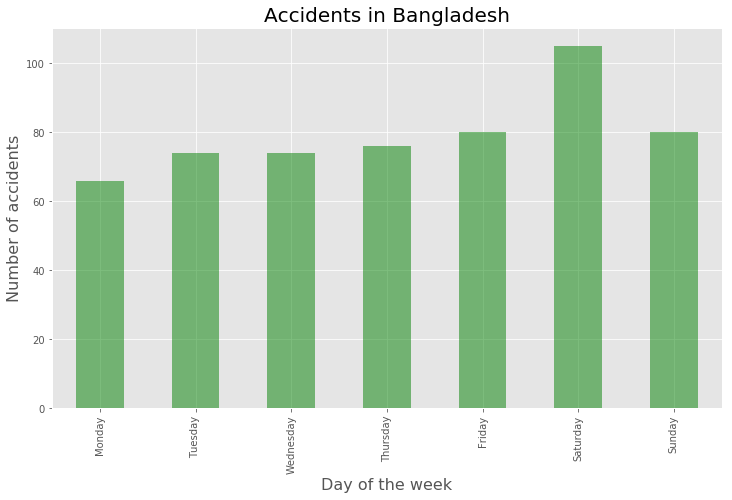

In [16]:
# Number of accident per day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date
# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]
# plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Bangladesh', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

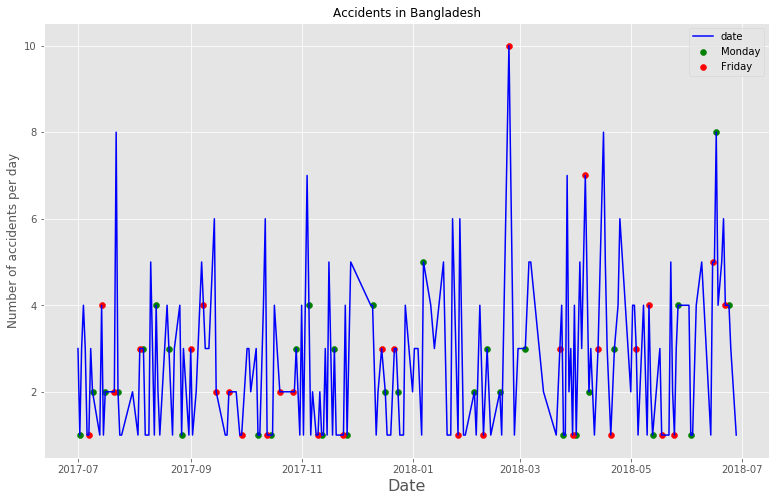

In [17]:
accidents = df.groupby(df['date'].dt.date).count().date

accidents.plot(figsize=(13,8), color='blue')

# monday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='Monday')

# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='Friday')

# Title, x label and y label
plt.title('Accidents in Bangladesh', fontsize=12)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=12);
plt.legend()

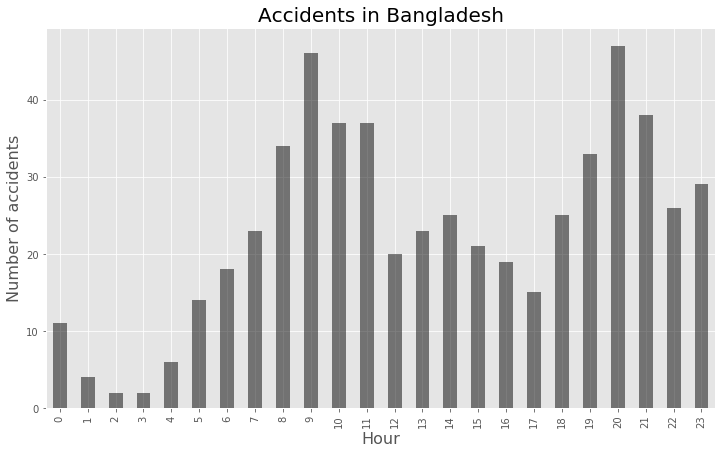

In [18]:
# Number of accident per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='black', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Bangladesh', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

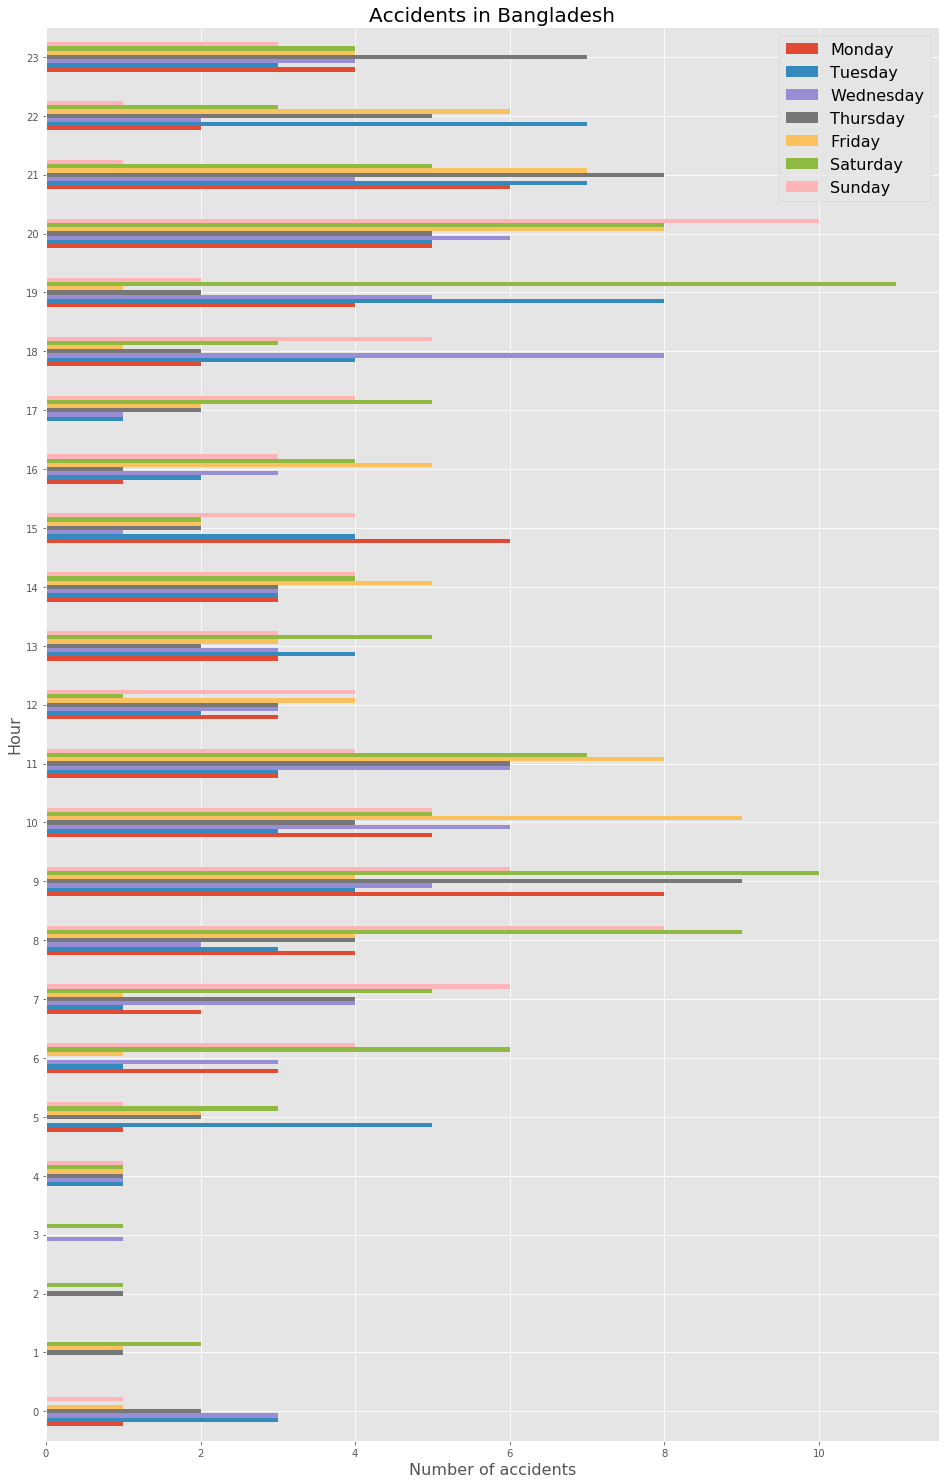

In [19]:
#we use a horizontal plot for better visualization.
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Bangladesh',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

<Figure size 1440x864 with 0 Axes>

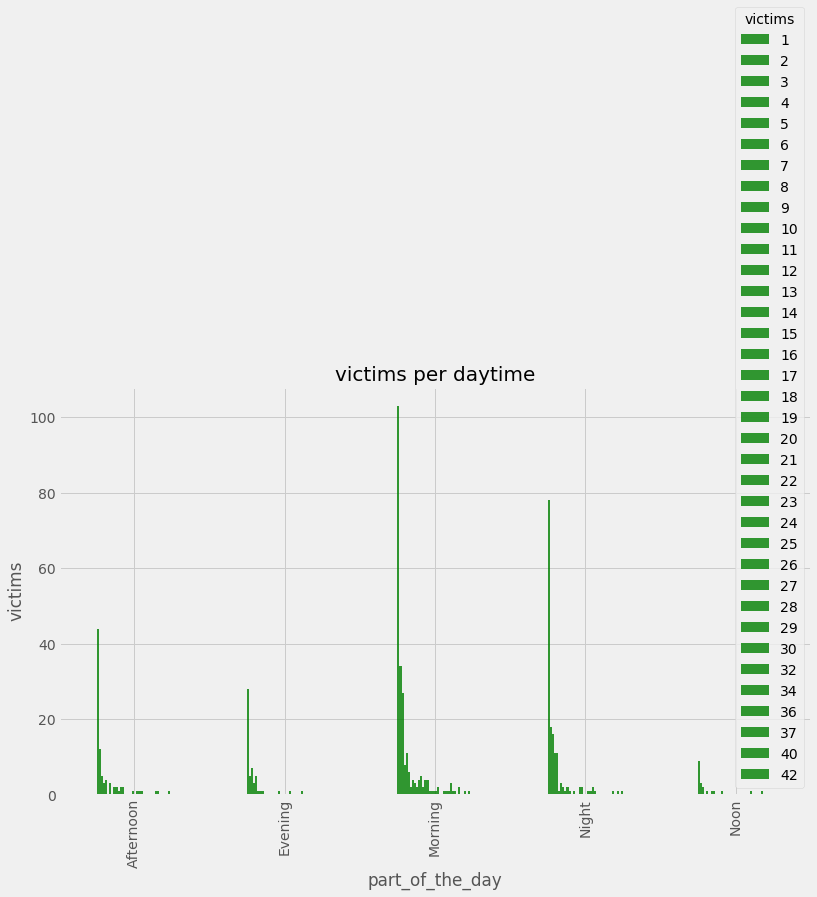

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,12))
table=pd.crosstab(df.part_of_the_day,df.victims)
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
table.plot(kind='bar',figsize=(12,7), color='green', alpha=0.8)
plt.title('victims per daytime', fontsize=20)
plt.xlabel('part_of_the_day')
plt.ylabel('victims')
plt.show()

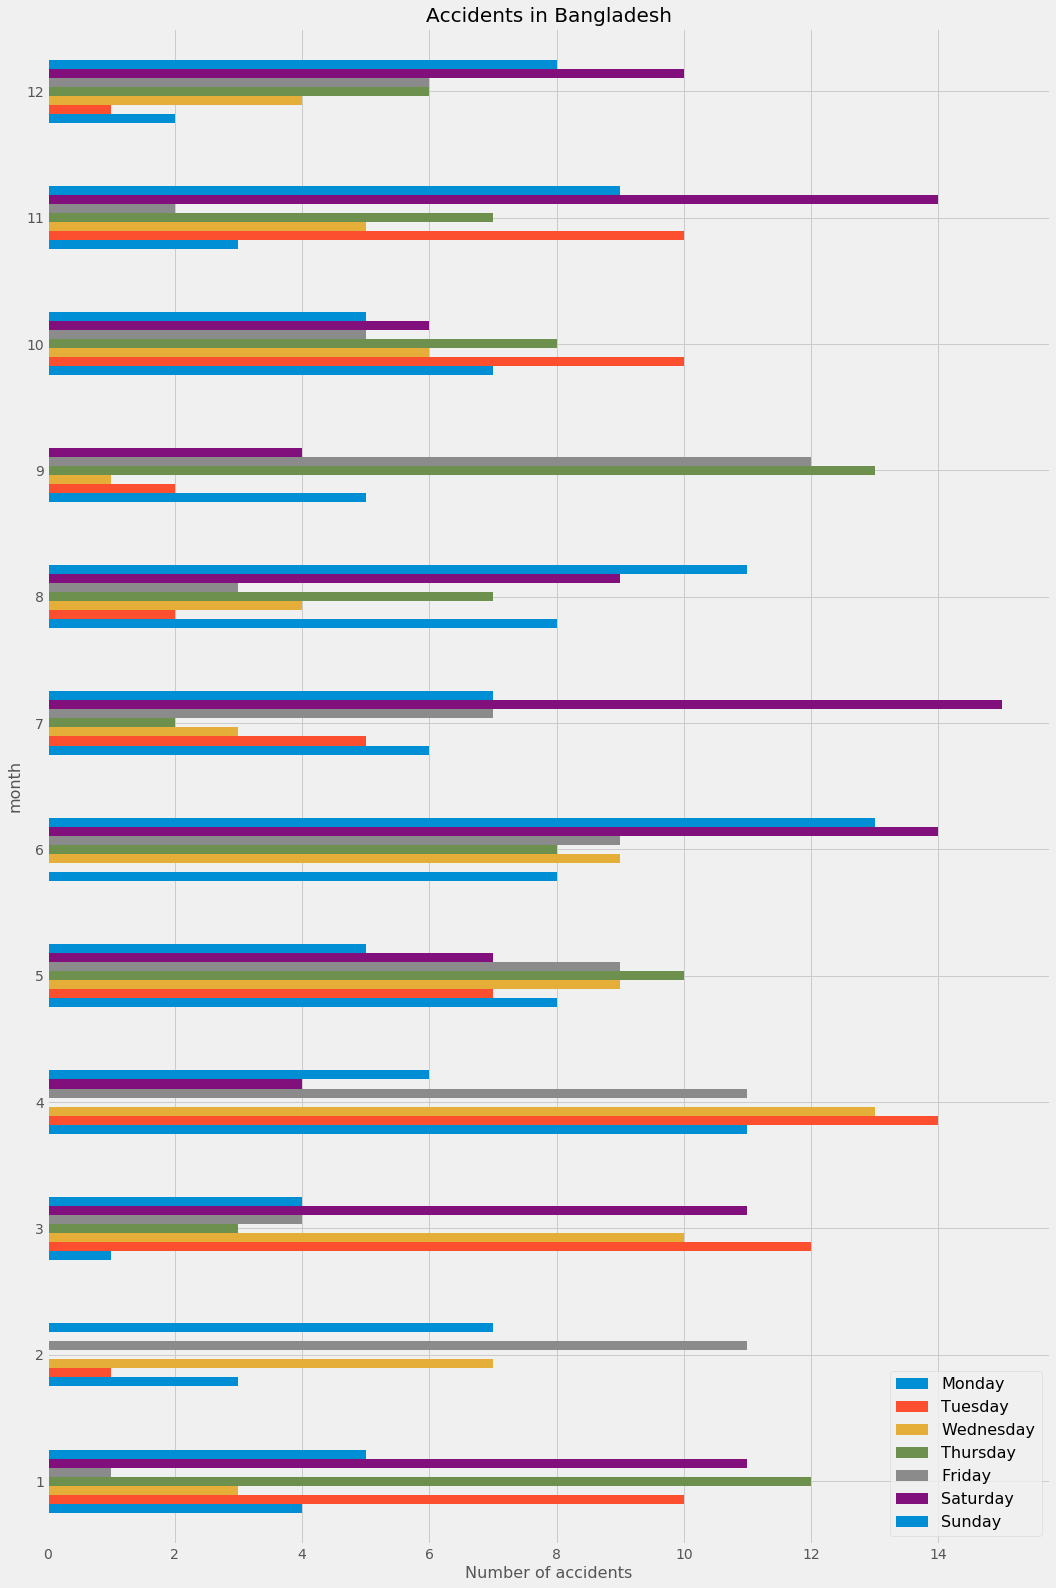

In [21]:
# Number of accident per month and day
accidents_hour_day = df.groupby([df['date'].dt.month.rename('month'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Bangladesh',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('month',fontsize=16);

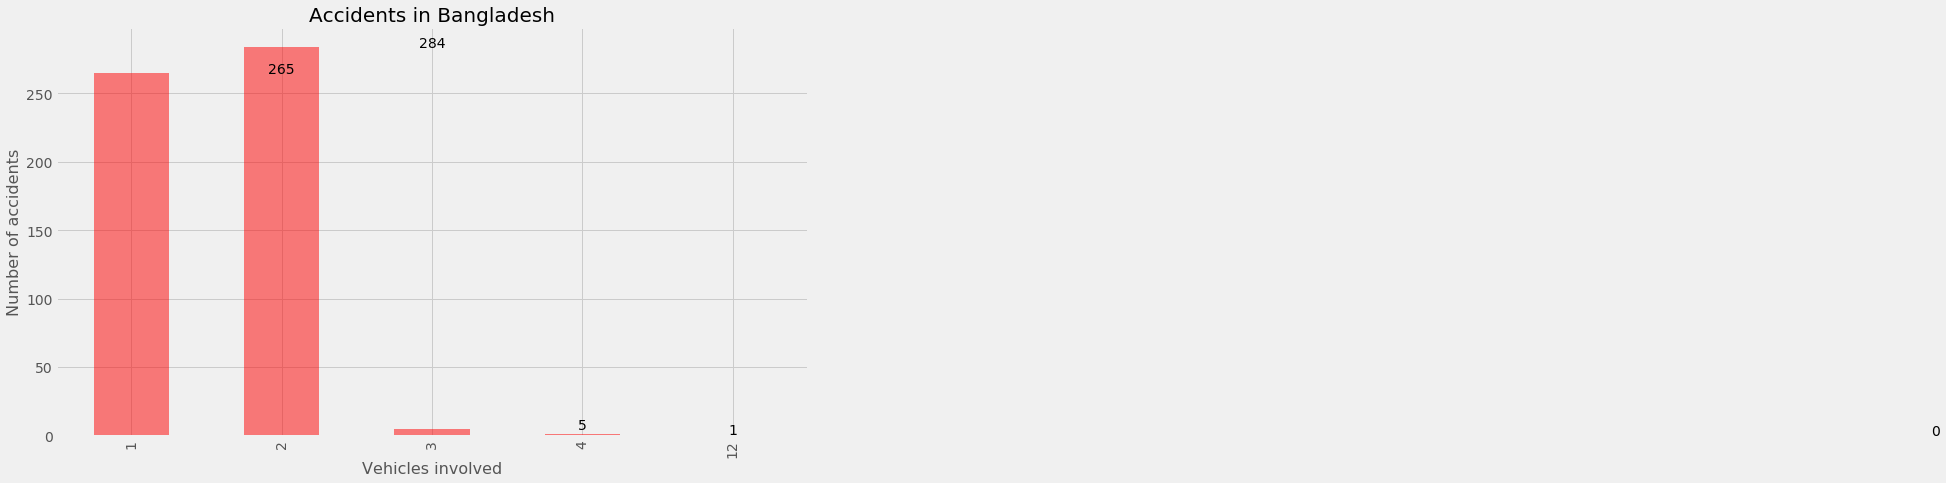

In [22]:
# Compute the number of accidents according to the number of vehicles involved
vehicle_involved = df.vehicle_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicle_involved[12]=0
vehicle_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicle_involved.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in Bangladesh',fontsize=20)
plt.xlabel('Vehicles involved',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Print a label above each bar indicating the number of accidents
for index in vehicle_involved.index:
    plt.text(x=index,y=vehicle_involved.loc[index],s=str(vehicle_involved.loc[index]),horizontalalignment='center')

In [23]:
df.vehicle_type.unique()
#list(df.column())

array(['bus', 'truck_cycle', 'truck', 'cycle', 'bus_cycle', 'bus_car',
       'truck_three_wheeler', 'three_wheeler', 'cycle_three_wheeler',
       'three_wheeler_rickshaw', 'bus_van', 'car', 'three_wheeler_cycle',
       'others', 'bus_truck', 'car_van', 'truck_rickshaw',
       'bus_three_wheeler', 'van', 'rickshaw', 'rickshaw_van',
       'truck_van', 'rickshaw_truck_van', 'van_cycle', 'bus_rickshaw',
       'van_rickshaw', 'car_rickshaw', 'three_wheeler_van', 'truck_car',
       'cycle_van', 'cycle_car', 'car_three_wheeler', 'rickshaw_car',
       'van_three_wheeler', 'three_wheeler_bus'], dtype=object)

Text(0, 0.5, '')

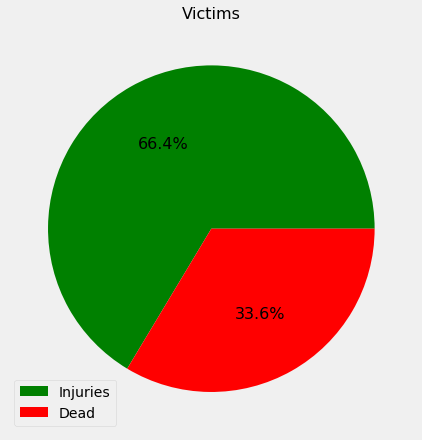

In [24]:
# Serie with number of injuries and dead
injuries = df[['injuries','dead']].sum()

# Pie plot with the percentage of victims with injuries and dead
injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=['Injuries', 'Dead'])
plt.title('Victims', fontsize=16)
plt.ylabel('')

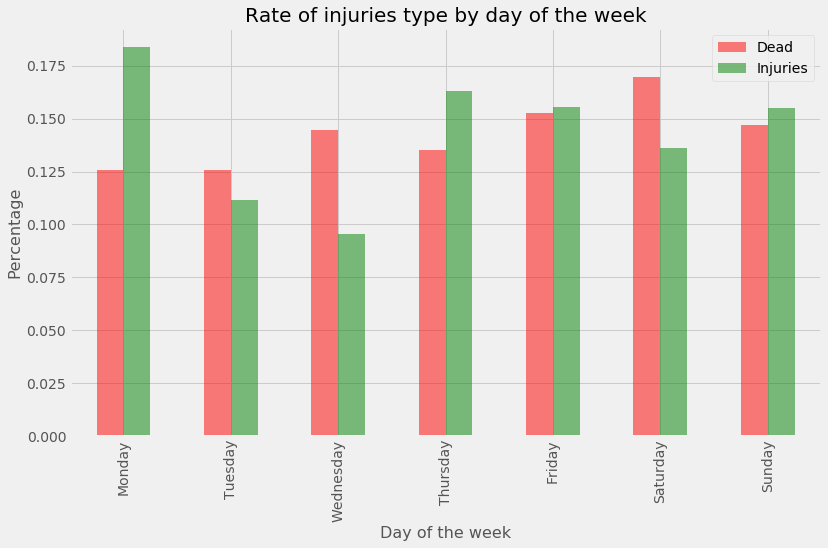

In [25]:
# Number of serious injuries per day of the week
accidents_serious = df[df['dead']!=0].groupby(df['date'].dt.dayofweek).sum().dead
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per day of the week
accidents_mild = df[df['injuries']!=0].groupby(df['date'].dt.dayofweek).sum().injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Dead':rate_serious,'Injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

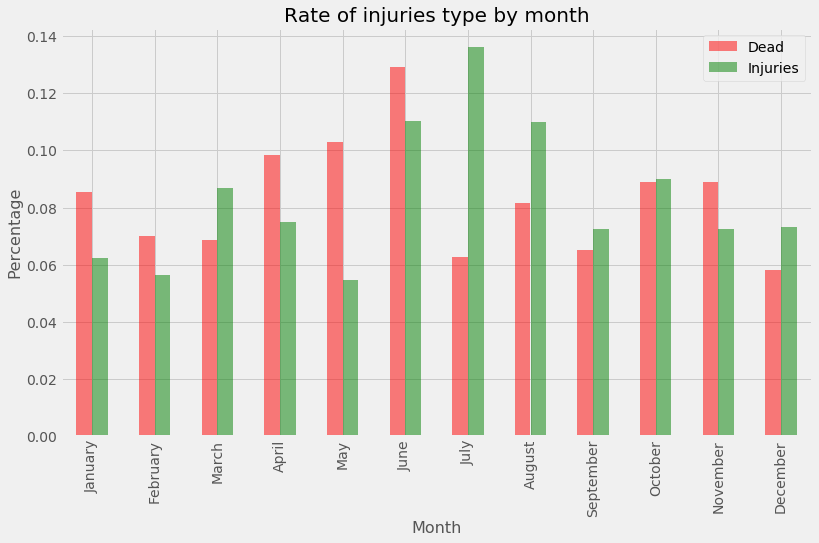

In [26]:
# Number of dead per month
accidents_serious = df[df['dead']!=0].groupby(df['date'].dt.month).sum().dead
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of injuries per month
accidents_mild = df[df['injuries']!=0].groupby(df['date'].dt.month).sum().injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Dead':rate_serious,'Injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by month',fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(12),[calendar.month_name[x] for x in range(1,13)]);

AttributeError: module 'calendar' has no attribute 'date'

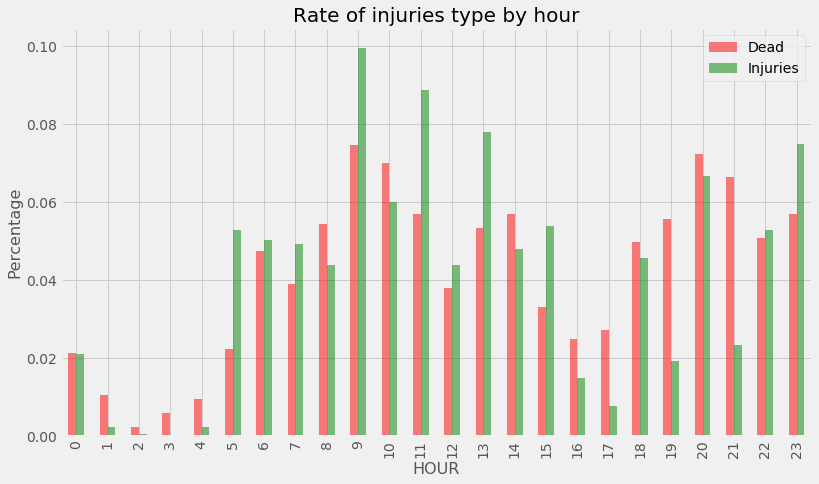

In [27]:
import datetime
# Number of serious injuries per hour 
accidents_serious = df[df['dead']!=0].groupby(df['date'].dt.hour).sum().dead
# Percentage of serious injuries per hour
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per hour
accidents_mild = df[df['injuries']!=0].groupby(df['date'].dt.hour).sum().injuries
# Percentage of mild injuries per hour
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Dead':rate_serious,'Injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by hour',fontsize=20)
plt.xlabel('HOUR',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.date[x] for x in range(0,7)]);

In [ ]:
import folium

# Define a map centered around BD
bd_map = folium.Map(location=[23.6850, 90.3563], zoom_start=12)

# Display the map
bd_map

In [ ]:
import ast
#import CircleMarker
# Create a map object of the city of BD
bd_map= folium.Map(location=[23.6850, 90.3563], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.dead.astype(str)):
    if label!='0':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(bd_map)
    
# Show map
bd_map

In [ ]:
from folium import plugins

# Create a map object of the city of BD
bd_map= folium.Map(location=[23.6850, 90.3563], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(bd_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.dead.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
bd_map

In [ ]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of BD
bd_map= folium.Map(location=[23.6850, 90.3563], zoom_start=12)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(df.latitude,df.longitude,df.date.dt.hour):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(bd_map)

bd_map

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = (df['part_of_the_day'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Morning', 'Noon', 'Afternoon', 'Evening', 'Night'],fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='vehicle_type', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='district_name', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()